## Train and save models

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import pickle

## Data Cleaning

In [2]:
data = pd.read_csv("data/voting_2021.csv")

In [3]:
data.columns

Index(['county_id', 'state', 'county', 'NAME', 'proj_X', 'proj_Y', 'total_pop',
       'new_pct_dem', 'sex_ratio', 'pct_black', 'pct_hisp', 'pct_bach',
       'median_income', 'pct_65_over', 'pct_age_18_29', 'gini', 'pct_manuf',
       'ln_pop_den', 'pct_3rd_party', 'turn_out', 'pct_fb', 'pct_uninsured'],
      dtype='object')

In [4]:
y = data.new_pct_dem.values.reshape(-1,1)

y = y - y.mean()

X_coords = data[['pct_black', 'pct_hisp', 'pct_bach',
       'median_income',
       'ln_pop_den', 'pct_3rd_party', 'pct_fb', 'proj_X', 'proj_Y']]

In [5]:
coords = np.array(list(zip(X_coords.proj_X, X_coords.proj_Y)))

In [6]:
X = X_coords.iloc[:,:-2].values

In [7]:
X = (np.array(X) - np.array(X).mean(axis=0))

## Model training

In [8]:
import mgwr
                
coords = np.array(list(zip(X_coords.values[:,-2], X_coords.values[:,-1])))

mgwr_selector = mgwr.sel_bw.Sel_BW(coords, y, X, multi=True)

gwr_bw = mgwr_selector.search(verbose=True)


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Current iteration: 1 ,SOC: 0.0051539
Bandwidths: 44.0, 44.0, 44.0, 73.0, 82.0, 46.0, 84.0, 72.0
Current iteration: 2 ,SOC: 0.0024785
Bandwidths: 44.0, 44.0, 50.0, 86.0, 86.0, 52.0, 92.0, 112.0
Current iteration: 3 ,SOC: 0.0018015
Bandwidths: 44.0, 44.0, 63.0, 90.0, 86.0, 82.0, 119.0, 154.0
Current iteration: 4 ,SOC: 0.0015965
Bandwidths: 44.0, 44.0, 92.0, 90.0, 46.0, 113.0, 122.0, 175.0
Current iteration: 5 ,SOC: 0.0012599
Bandwidths: 44.0, 44.0, 119.0, 90.0, 44.0, 131.0, 122.0, 190.0
Current iteration: 6 ,SOC: 0.0010629
Bandwidths: 44.0, 44.0, 132.0, 92.0, 44.0, 154.0, 131.0, 221.0
Current iteration: 7 ,SOC: 0.0009642
Bandwidths: 44.0, 44.0, 179.0, 92.0, 44.0, 161.0, 132.0, 225.0
Current iteration: 8 ,SOC: 0.0008727
Bandwidths: 44.0, 44.0, 238.0, 92.0, 44.0, 171.0, 132.0, 261.0
Current iteration: 9 ,SOC: 0.0007829
Bandwidths: 44.0, 44.0, 286.0, 92.0, 44.0, 190.0, 131.0, 284.0
Current iteration: 10 ,SOC: 0.0006873
Bandwidths: 44.0, 44.0, 319.0, 92.0, 44.0, 196.0, 131.0, 336.0
Current i

Current iteration: 82 ,SOC: 1.34e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 83 ,SOC: 1.31e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 84 ,SOC: 1.28e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 85 ,SOC: 1.26e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 86 ,SOC: 1.23e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 87 ,SOC: 1.2e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 88 ,SOC: 1.18e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 89 ,SOC: 1.15e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 90 ,SOC: 1.13e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0, 44.0, 278.0, 210.0, 1448.0
Current iteration: 91 ,SOC: 1.1e-05
Bandwidths: 44.0, 44.0, 1495.0, 153.0,

In [9]:
gwr_bw

array([  44.,   44., 1495.,  153.,   44.,  278.,  210., 1448.])

In [10]:
%%time
mgwr_model = mgwr.gwr.MGWR(coords, y, X, selector=mgwr_selector).fit()

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 1h 23min 40s, sys: 24min 37s, total: 1h 48min 18s
Wall time: 10min 58s


In [11]:
mgwr_model.R2

0.9327945356732034

In [12]:
import geopandas as gpd
us_county = gpd.read_file("cb_2018_us_county_500k")

In [13]:
us_county["county_id"] = us_county.GEOID.astype(int)

In [14]:
context = mgwr_model.params[:,0]

In [15]:
counties = gpd.GeoDataFrame(data.merge(us_county,on="county_id")).to_crs("ESRI:102039")

In [16]:
state = counties.dissolve("state")

In [17]:
masked_geo = np.where(mgwr_model.filter_tvals(critical_t=1.96)==0, np.nan, mgwr_model.params)

<Axes: >

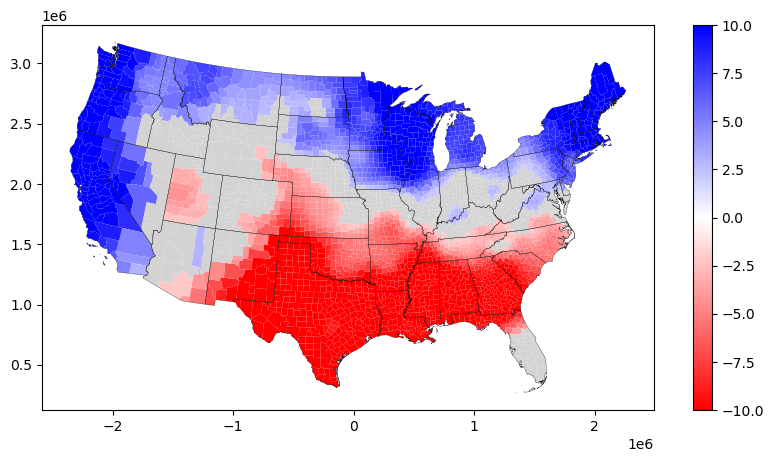

In [18]:
ax = counties.plot(masked_geo[:,0],cmap="bwr_r",vmin= -10,vmax=10,
                                                            legend=True,figsize=(10,5), missing_kwds={
             "color": "lightgrey"})

counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)

#plt.savefig("Geo_contribution_MGWR.png",dpi=300)

In [19]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 'bwr' colormap
cmap1 = plt.get_cmap('bwr')
cmap2 = plt.get_cmap('bwr_r')

# Extract the red portion by using the upper half of the colormap (0.5 to 1)
reds_cmap = LinearSegmentedColormap.from_list('reds_cmap', cmap1(np.linspace(0.5, 1, 256)))

blues_cmap = LinearSegmentedColormap.from_list('blues_cmap', cmap2(np.linspace(0.5, 1, 256)))


pct_3rd_party


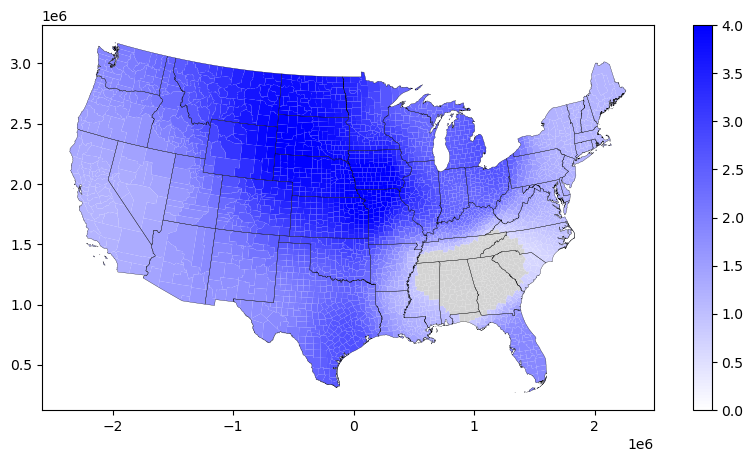

In [20]:
for j in [5]:
    ax = counties.plot(masked_geo[:,j],cmap=blues_cmap,vmin=0,vmax=4,
                                                            legend=True,figsize=(10,5), missing_kwds={
             "color": "lightgrey"})

    counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)
    print(X_coords.columns[j])

#plt.savefig("Geo_contribution.png",dpi=300)

pct_hisp


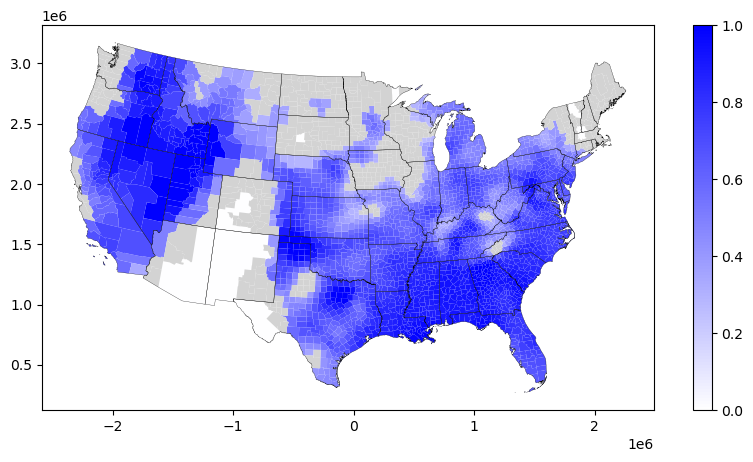

In [21]:
for j in [1]:
    ax = counties.plot(masked_geo[:,j],cmap=blues_cmap,vmin=0,vmax=1,
                                                            legend=True,figsize=(10,5), missing_kwds={
             "color": "lightgrey"})

    counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)
    print(X_coords.columns[j])

#plt.savefig("Geo_contribution.png",dpi=300)

median_income


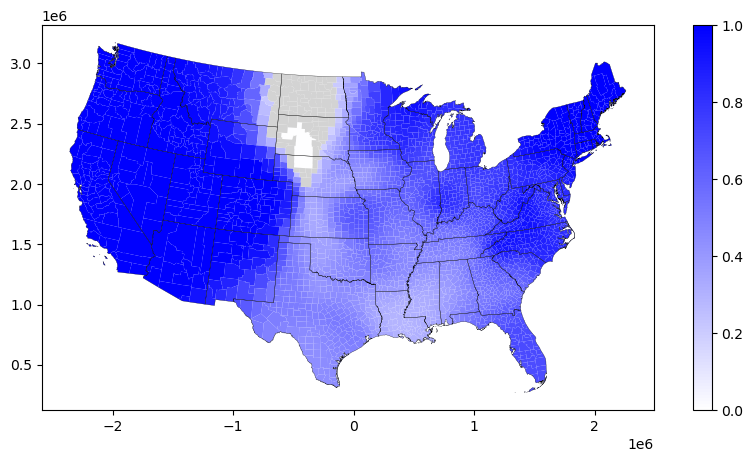

In [22]:
for j in [3]:
    ax = counties.plot(masked_geo[:,j],cmap=blues_cmap,vmin=0,vmax=1,
                                                            legend=True,figsize=(10,5), missing_kwds={
             "color": "lightgrey"})

    counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)
    print(X_coords.columns[j])